MSE (Fused): 0.6007, MSE (Kalman): 2.4698


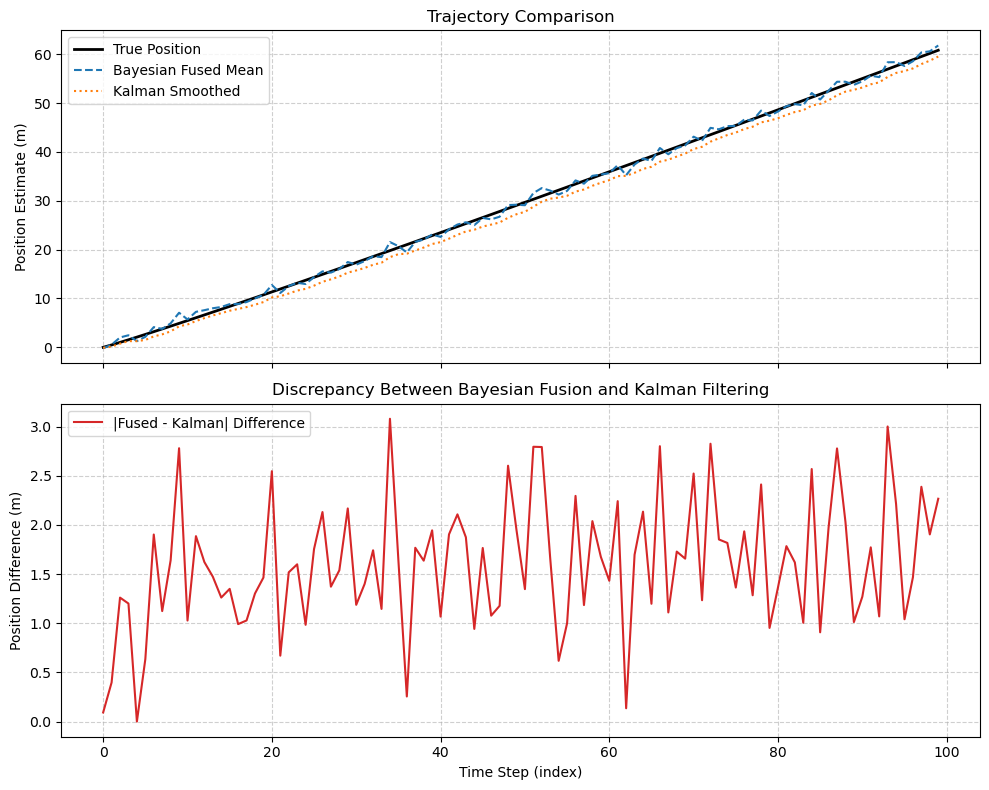

Information Gain from Sensor Update: 0.029 bits

Trajectory Comparison and Discrepancy Plot after the Information Gain
MSE (Fused): 0.5522, MSE (Kalman): 2.9374


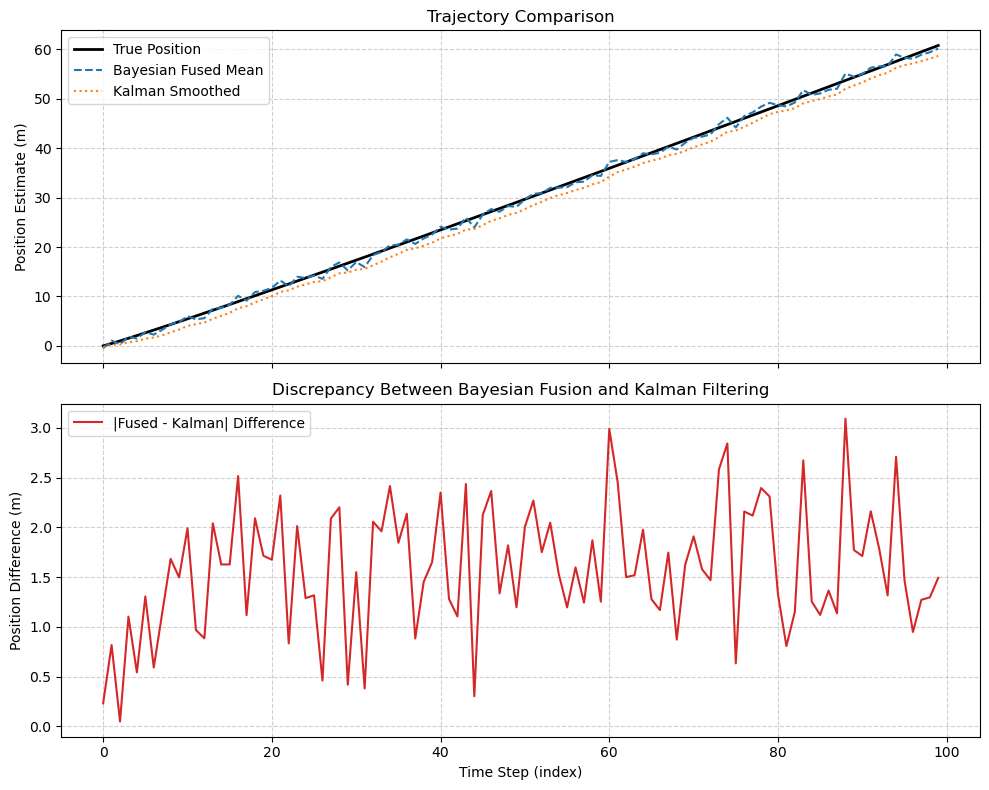

Demo complete: Simplified Bayesian fusion + Kalman filtering executed successfully.
Requirements.txt generated.


In [7]:
# Bayesian Sensor Fusion and Dynamic Target Tracking 
# -------------------------------------------------
# Author: Sameer Kumar Jasra, PhD
# Purpose: Demonstrate probabilistic fusion of multi-sensor data for Next-Gen surveillance systems integrating probabilistic reasoning, reinforcement learning and deep fusion networks for real-time decision-making.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# -----------------------------
# 1. Data Simulation
# -----------------------------
def generate_data(steps=100, radar_noise=1.0, lidar_noise=1.2):
    #np.random.seed(42)
    true_pos = np.linspace(0, 50, steps)**1.05  # nonlinear trajectory
    radar_data = true_pos + np.random.normal(0, radar_noise, steps)
    lidar_data = true_pos + np.random.normal(0, lidar_noise, steps)
    return true_pos, radar_data, lidar_data

true_pos, radar_data, lidar_data = generate_data()

# -----------------------------
# 2. Bayesian Fusion
# -----------------------------
def bayesian_fusion(mu1, sigma1, mu2, sigma2):
    fused_mu = (mu1 / sigma1**2 + mu2 / sigma2**2) / (1/sigma1**2 + 1/sigma2**2)
    fused_sigma = np.sqrt(1 / (1/sigma1**2 + 1/sigma2**2))
    return fused_mu, fused_sigma

fused_pos, fused_std = [], []
radar_noise, lidar_noise = 1.0, 1.2
for r, l in zip(radar_data, lidar_data):
    mu, std = bayesian_fusion(r, radar_noise, l, lidar_noise)
    fused_pos.append(mu)
    fused_std.append(std)

# -----------------------------
# 3. Kalman Filter
# -----------------------------
class KalmanFilter:
    def __init__(self, A=1, H=1, Q=0.1, R=1, x0=0, P0=1):
        self.A, self.H, self.Q, self.R = A, H, Q, R
        self.x, self.P = x0, P0

    def predict(self):
        self.x = self.A * self.x
        self.P = self.A * self.P * self.A + self.Q

    def update(self, z):
        K = self.P * self.H / (self.H * self.P * self.H + self.R)
        self.x = self.x + K * (z - self.H * self.x)
        self.P = (1 - K * self.H) * self.P
        return self.x

kf = KalmanFilter(Q=0.1, R=radar_noise)
kf_estimates = []
for z in fused_pos:
    kf.predict()
    kf_estimates.append(kf.update(z))

# -----------------------------
# 4. Evaluation and Visualization 
# -----------------------------
def evaluate(true_pos, fused_pos, kf_estimates):
    mse_fused = mean_squared_error(true_pos, fused_pos)
    mse_kf = mean_squared_error(true_pos, kf_estimates)
    print(f"MSE (Fused): {mse_fused:.4f}, MSE (Kalman): {mse_kf:.4f}")

    time_steps = np.arange(len(true_pos))

    fig, axs = plt.subplots(2, 1, figsize=(10,8), sharex=True)

    # Trajectories
    axs[0].plot(time_steps, true_pos, label='True Position', color='k', linewidth=2)
    axs[0].plot(time_steps, fused_pos, label='Bayesian Fused Mean', linestyle='--', color='tab:blue')
    axs[0].plot(time_steps, kf_estimates, label='Kalman Smoothed', linestyle=':', color='tab:orange')
    axs[0].set_ylabel('Position Estimate (m)')
    axs[0].set_title('Trajectory Comparison')
    axs[0].legend(); axs[0].grid(True, linestyle='--', alpha=0.6)

    # Diagnostic plot: difference over time
    diff = np.abs(np.array(fused_pos) - np.array(kf_estimates))
    axs[1].plot(time_steps, diff, color='tab:red', label='|Fused - Kalman| Difference')
    axs[1].set_xlabel('Time Step (index)')
    axs[1].set_ylabel('Position Difference (m)')
    axs[1].set_title('Discrepancy Between Bayesian Fusion and Kalman Filtering')
    axs[1].legend(); axs[1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

evaluate(true_pos, fused_pos, kf_estimates)

# -----------------------------
# 5. Information Gain Calculation
# -----------------------------
from math import log

def entropy(p):
    return -np.sum(p * np.log2(p + 1e-9))

def information_gain(prior, evidence):
    H_prior = entropy(prior)
    H_post = entropy(evidence / np.sum(evidence))
    return H_prior - H_post

prior = np.ones(2)/2
evidence = np.array([0.6, 0.4])
info_gain = information_gain(prior, evidence)
print(f"Information Gain from Sensor Update: {info_gain:.3f} bits")
print("\n\033[1mTrajectory Comparison and Discrepancy Plot after the Information Gain\033[0m")

# -----------------------------
# 6. End-to-End Demo
# -----------------------------
def run_demo():
    true_pos, radar_data, lidar_data = generate_data()
    fused_pos, fused_std = [], []
    for r, l in zip(radar_data, lidar_data):
        mu, std = bayesian_fusion(r, 1.0, l, 1.2)
        fused_pos.append(mu)
        fused_std.append(std)
    kf = KalmanFilter(Q=0.1, R=1.0)
    kf_estimates = []
    for z in fused_pos:
        kf.predict()
        kf_estimates.append(kf.update(z))
    evaluate(true_pos, fused_pos, kf_estimates)
    print("Demo complete: Simplified Bayesian fusion + Kalman filtering executed successfully.")

run_demo()

# -----------------------------
# 7. Requirements Export
# -----------------------------
with open('requirements.txt', 'w') as f:
    f.write("numpy\nmatplotlib\nscikit-learn\n")

print("Requirements.txt generated.")